In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Load the dataset into python environment

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.  Making Passenger ID as index

In [4]:
data.set_index('PassengerId', inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  3. Basic Details of the dataset

In [6]:
data.shape

(891, 11)

In [7]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### 4.  Fill in all the missing values present in all the columns in the dataset

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Column 'Cabin' has lots of missing value. Dropping the column cabin

In [10]:
data = data.drop('Cabin', axis =1)

#### Filling Missing values in 'Age' column

Using median of age to fill the missing values 

<AxesSubplot:xlabel='Age', ylabel='Count'>

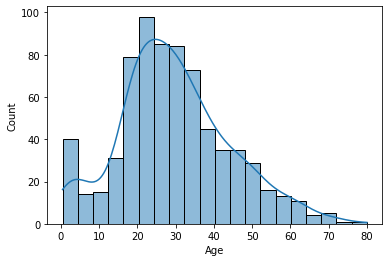

In [11]:
sns.histplot(x = 'Age', data=data, kde=True)

In [12]:
data['Age'].fillna(data['Age'].median(), inplace = True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


#### Fixing missing values in 'Embarked' Column

In [13]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
data['Embarked'].isna().sum()

2

Using mode to fill missing values in 'Embarked' column

In [15]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### 5. Fixing outliers

<AxesSubplot:xlabel='Fare'>

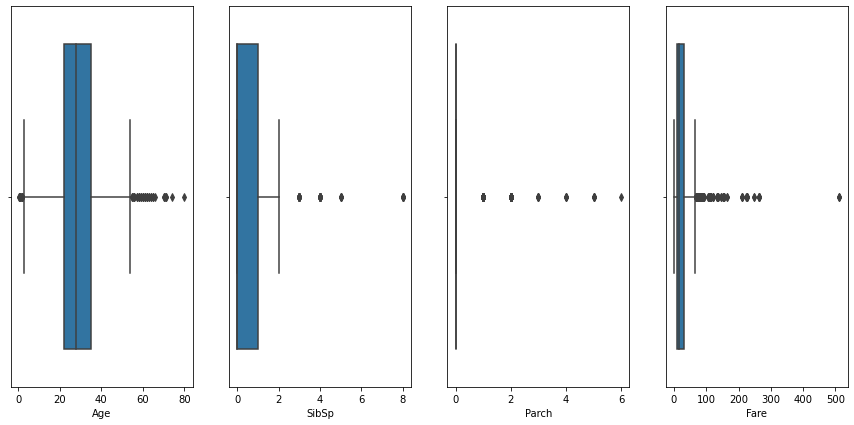

In [17]:
fig, axs = plt.subplots(ncols=4, figsize=(15,7))
sns.boxplot(x='Age',data=data,  ax=axs[0])
sns.boxplot(x='SibSp', data=data, ax=axs[1])
sns.boxplot(x='Parch', data=data,  ax=axs[2])
sns.boxplot(x='Fare', data=data,  ax=axs[3])

#### Fixing outliers in featue 'Age'

In [18]:
q1 = np.percentile(data['Age'],25, interpolation='midpoint')
q2 = np.percentile(data['Age'],50, interpolation='midpoint')
q3 = np.percentile(data['Age'],75, interpolation='midpoint')
print(q1,q2,q3)

22.0 28.0 35.0


iqr = q3-q1
low_lim = q1 - 1.5*iqr
up_lim = q3 + 1.5*iqr
print(low_lim, up_lim)

In [20]:
drp_in = data[(data['Age']<low_lim) | (data['Age']>up_lim)].index
drp_in

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

Dropping records of outliers in 'Age' 

In [21]:
data.drop(index = drp_in, inplace=True)

In [22]:
data.shape

(825, 10)

#### Fixing outliers in 'Fare' Column

In [23]:
Q1 = np.percentile(data['Fare'],25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'],50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'],75, interpolation='midpoint')


In [24]:
print(Q1,Q2,Q3)

7.8958 13.4167 30.0708


In [25]:
iqr = Q3-Q1
low_lim = Q1 - 1.5*iqr
up_lim = Q3 + 1.5*iqr
print(low_lim, up_lim)


-25.366699999999994 63.333299999999994


In [26]:
drp_in = data[(data['Fare']>up_lim) | (data['Fare']<low_lim)].index
drp_in

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [27]:
data.drop(index = drp_in, inplace=True)

In [29]:
data.shape

(718, 10)

#### Fixing Outliers in 'SibSp' Feature (Sibling-Spouse)

In [30]:
Q1 = np.percentile(data['SibSp'],25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'],50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'],75, interpolation='midpoint')
iqr = Q3-Q1
low_lim = Q1 - 1.5*iqr
up_lim = Q3 + 1.5*iqr
print(low_lim, up_lim)

-1.5 2.5


In [31]:
drp_in = data[(data['SibSp']>up_lim) | (data['SibSp']<low_lim)].index
drp_in

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [32]:
data.drop(index = drp_in, inplace=True)

In [33]:
data.shape

(689, 10)

Dropping less important features like Name and Ticket

In [35]:
data.drop(['Name','Ticket'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
6,0,3,male,28.0,0,0,8.4583,Q
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [36]:
data_dum = pd.get_dummies(data)
data_dum

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1
6,0,3,28.0,0,0,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,0,3,28.0,1,2,23.4500,1,0,0,0,1


### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [37]:
y = data_dum['Survived']
X = data_dum.drop('Survived', axis=1)

In [38]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X  = min_max.fit_transform(X)

In [39]:
X = pd.DataFrame(X)

In [40]:
X

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.372549,0.5,0.000000,0.118118,0.0,1.0,0.0,0.0,1.0
1,1.0,0.450980,0.0,0.000000,0.129115,1.0,0.0,0.0,0.0,1.0
2,0.0,0.627451,0.5,0.000000,0.865114,1.0,0.0,0.0,0.0,1.0
3,1.0,0.627451,0.0,0.000000,0.131152,0.0,1.0,0.0,0.0,1.0
4,1.0,0.490196,0.0,0.000000,0.137804,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
684,0.5,0.470588,0.0,0.000000,0.211798,0.0,1.0,0.0,0.0,1.0
685,0.0,0.313725,0.0,0.000000,0.488765,1.0,0.0,0.0,0.0,1.0
686,1.0,0.490196,0.5,0.333333,0.382051,1.0,0.0,0.0,0.0,1.0
687,0.0,0.450980,0.0,0.000000,0.488765,0.0,1.0,1.0,0.0,0.0
